**Description:** The random forest model to predict house pricing from boston data set.


In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [ ]:
#loading the dataset from sklearn 
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston['feature_names'])
bos_target=pd.DataFrame(boston.target,columns=['MEDV'])
boston=pd.concat([bos,bos_target],axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Checking for the datatypes of the data and null values
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


* There are no null values

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Hist plot**

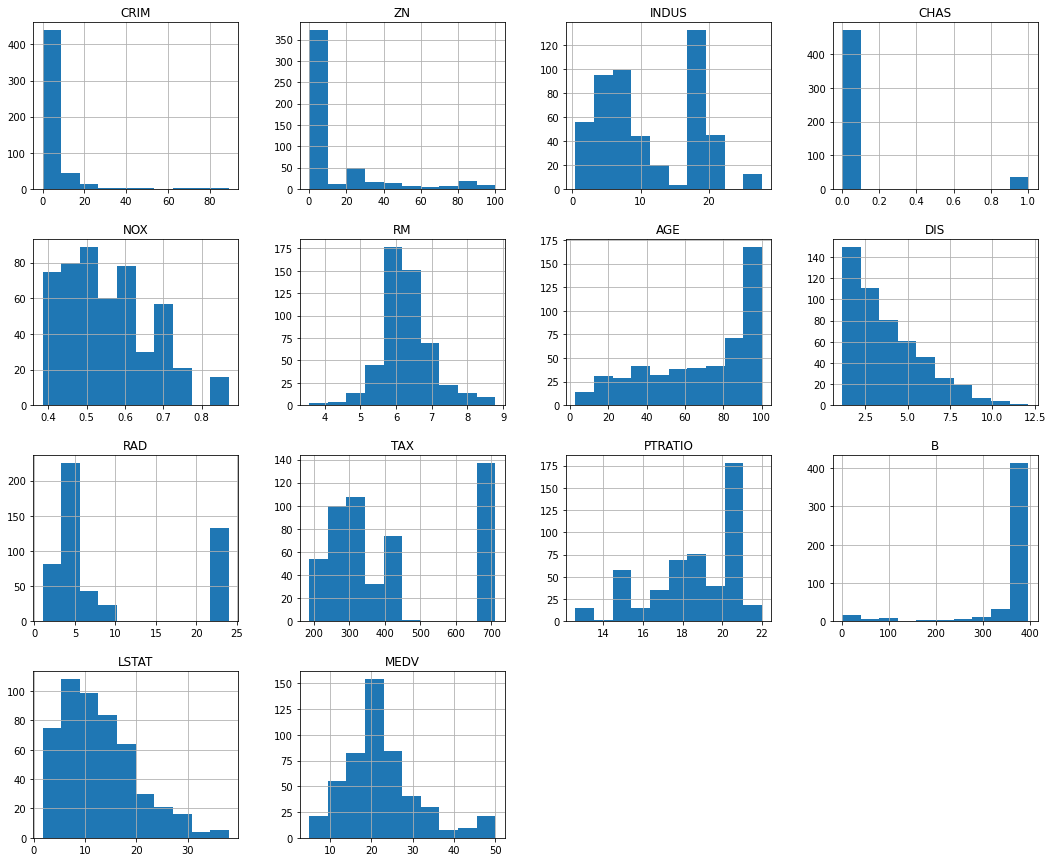

In [ ]:
boston.hist(figsize=(18,15))
plt.show()

**Looking at the correlations**

In [ ]:
boston.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

### Heatmap

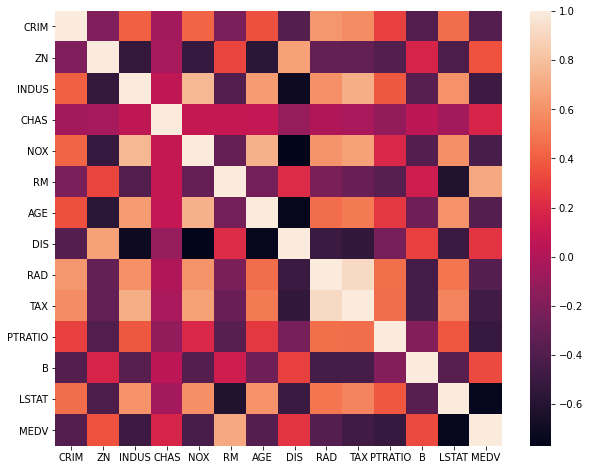

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(boston.corr())

In [ ]:


#Creating the X and y 

y = boston['MEDV']
X =boston.drop(columns = ['MEDV'])

## Train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(boston_scaled_df,y,test_size = 0.3,random_state=355) 

### Regression Analysis

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Evaluate model

In [19]:
# pred=lin_reg.predict(x_test)
print('r-squared for train set : ',reg.score(x_train,y_train))
print('r-squared for test set : ',reg.score(x_test,y_test))

# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print('Adjusted r-squared for train set:', adj_r2(x_train,y_train))
print('Adjusted r-squared for test set:', adj_r2(x_test,y_test))

from sklearn.model_selection import cross_val_score

print('cross validation score for 5 sets :', cross_val_score(reg, x_train, y_train, cv=5))

r-squared for train set :  0.9795015627203808
r-squared for test set :  0.8816065247761975
Adjusted r-squared for train set: 0.9787177989420425
Adjusted r-squared for test set: 0.870453516240622
cross validation score for 5 sets : [0.86908009 0.9057407  0.89677638 0.85347632 0.70341776]


### Hyperparameter tuning

In [26]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=reg,param_distributions=grid_param,cv=5,n_jobs =-1,verbose = 3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [27]:
#let's see the best parameters as per our grid search
random_search.best_params_

{'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 130}

In [32]:

reg=RandomForestRegressor(max_depth= 13,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 3,
 n_estimators= 130)
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##Evaluating the model

In [38]:
# pred=lin_reg.predict(x_test)
print('r-squared for train set : ',reg.score(x_train,y_train))
print('r-squared for test set : ',reg.score(x_test,y_test))

# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print('Adjusted r-squared for train set:', adj_r2(x_train,y_train))
print('Adjusted r-squared for test set:', adj_r2(x_test,y_test))

from sklearn.model_selection import cross_val_score

print('Mean cross validation score for 5 sets :', round(cross_val_score(reg, x_train, y_train, cv=5).mean(),2))

r-squared for train set :  0.9743712749435027
r-squared for test set :  0.8807787336325644
Adjusted r-squared for train set: 0.9733913531031072
Adjusted r-squared for test set: 0.869547744771864
Mean cross validation score for 5 sets : 0.84


The mean r-squared score can be found as 0.84